#FIFA 20 Football is arguably the most popular sport in the world and FIFA is the most popular football (soccer) simulation game by Electronic Arts (EA Sports).

#Data-Driven Analysis and Clustering of Football Players Based on Skill Attributes

###This project aims to analyze football player data using data-driven techniques to uncover meaningful patterns in player performance. By focusing on skill-based attributes such as passing, dribbling, pace, shooting, defending, and physical strength, the players are grouped into similar clusters using machine learning algorithms such as K-Means and PCA



#IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/players_20.csv')

In [ ]:
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [ ]:
df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [ ]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [ ]:
df.isnull().sum()

,0
sofifa_id,0
player_url,0
short_name,0
long_name,0
age,0
...,...
lb,2036
lcb,2036
cb,2036
rcb,2036


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(18278, 104)

In [ ]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [ ]:
list(df.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [ ]:
df['nationality'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Slovenia', 'Belgium',
       'Germany', 'Netherlands', 'Croatia', 'Egypt', 'France', 'Senegal',
       'England', 'Spain', 'Italy', 'Uruguay', 'Poland', 'Denmark',
       'Gabon', 'Korea Republic', 'Costa Rica', 'Slovakia',
       'Bosnia Herzegovina', 'Serbia', 'Scotland', 'Hungary',
       'Switzerland', 'Greece', 'Austria', 'Morocco', 'Sweden', 'Wales',
       'Colombia', 'Czech Republic', 'Chile', 'Algeria', 'Ivory Coast',
       'Togo', 'Norway', 'Mexico', 'Iceland', 'Finland', 'Jamaica',
       'Albania', 'Guinea', 'Cameroon', 'Ghana', 'Montenegro', 'Ukraine',
       'Russia', 'DR Congo', 'Central African Rep.', 'Venezuela',
       'Nigeria', 'Armenia', 'Israel', 'Ecuador', 'Paraguay', 'Australia',
       'Turkey', 'Romania', 'Japan', 'Mali', 'United States', 'Kosovo',
       'Dominican Republic', 'Tanzania', 'China PR', 'Northern Ireland',
       'Republic of Ireland', 'Tunisia', 'Cape Verde', 'FYR Macedonia',
       'Burkina Faso', 'Ke

In [ ]:
df['club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Atlético Madrid', 'Real Madrid', 'Manchester City', 'Liverpool',
       'Napoli', 'Tottenham Hotspur', 'Manchester United', 'Chelsea',
       'FC Bayern München', 'Inter', 'Borussia Dortmund', 'Arsenal',
       'Valencia CF', 'Lazio', 'Milan', 'Sporting CP',
       'Olympique Lyonnais', 'RB Leipzig', 'Ajax', 'LA Galaxy',
       'Atalanta', 'RC Celta', 'Bayer 04 Leverkusen', 'Real Betis',
       'FC Porto', 'SV Werder Bremen', 'West Ham United',
       'Wolverhampton Wanderers', 'AS Saint-Étienne', 'Torino',
       'Dalian YiFang FC', 'Borussia Mönchengladbach', 'Roma',
       'Guangzhou Evergrande Taobao FC', 'SL Benfica',
       'Medipol Başakşehir FK', 'Everton', 'VfL Wolfsburg',
       'Crystal Palace', 'Getafe CF', 'Shanghai SIPG FC',
       'Eintracht Frankfurt', 'Olympique de Marseille', 'Hertha BSC',
       'RSC Anderlecht', 'Villarreal CF', 'Sampdoria', 'Leicester City',
       'AS Monaco', 'Jiangsu Suning FC', '

In [ ]:
for col in df.columns:
  print(f'{col}: {df[col].nunique()}')

sofifa_id: 18278
player_url: 18278
short_name: 17354
long_name: 18218
age: 27
dob: 6142
height_cm: 49
weight_kg: 56
nationality: 162
club: 698
overall: 47
potential: 47
value_eur: 214
wage_eur: 141
player_positions: 643
preferred_foot: 2
international_reputation: 5
weak_foot: 5
skill_moves: 5
work_rate: 9
body_type: 10
real_face: 2
release_clause_eur: 1224
player_tags: 83
team_position: 29
team_jersey_number: 99
loaned_from: 316
joined: 1760
contract_valid_until: 8
nation_position: 26
nation_jersey_number: 30
pace: 70
shooting: 79
passing: 68
dribbling: 71
defending: 76
physic: 61
gk_diving: 47
gk_handling: 47
gk_kicking: 52
gk_reflexes: 48
gk_speed: 53
gk_positioning: 50
player_traits: 921
attacking_crossing: 88
attacking_finishing: 93
attacking_heading_accuracy: 89
attacking_short_passing: 84
attacking_volleys: 87
skill_dribbling: 92
skill_curve: 89
skill_fk_accuracy: 89
skill_long_passing: 85
skill_ball_control: 90
movement_acceleration: 86
movement_sprint_speed: 86
movement_agility

In [ ]:
columns_drop=['dob','sofifa_id', 'player_url', 'long_name', 'body_type', 'real_face', 'loaned_from', 'nation_position', 'nation_jersey_number','joined']

In [ ]:
df.drop(columns=columns_drop, inplace=True)

In [ ]:
df

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,Xiao Mingjie,22,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,Zhang Wei,19,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,Wang Haijian,18,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [ ]:
df['BMI']=df['weight_kg']/(df['height_cm']/100)**2

In [ ]:
df['BMI'].head(10)

,BMI
0,24.913495
1,23.735308
2,22.204082
3,24.615211
4,24.163265
5,21.366869
6,24.307244
7,24.698650
8,22.309356
9,23.183673


In [ ]:
df

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,24.913495
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,23.735308
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,22.204082
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.615211
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,24.163265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,...,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2,22.835010
18274,Xiao Mingjie,22,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,...,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2,21.066743
18275,Zhang Wei,19,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,...,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2,21.678807
18276,Wang Haijian,18,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,...,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2,21.621622


In [ ]:
players_position=df['player_positions'].str.get_dummies(sep=',').add_prefix('position_')

In [ ]:
players_position

,position_ CAM,position_ CB,position_ CDM,position_ CF,position_ CM,position_ LB,position_ LM,position_ LW,position_ LWB,position_ RB,...,position_GK,position_LB,position_LM,position_LW,position_LWB,position_RB,position_RM,position_RW,position_RWB,position_ST
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df=pd.concat([df,players_position],axis=1)


In [ ]:
df=df.drop('player_positions',axis=1)

In [ ]:
df

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,position_GK,position_LB,position_LM,position_LW,position_LWB,position_RB,position_RM,position_RW,position_RWB,position_ST
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,0,0,0,0,0,0,0,1,0,0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,0,0,0,0,0,0,0,0,0,1
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,0,0,0,1,0,0,0,0,0,0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,1,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,...,0,0,0,0,0,0,0,0,0,0
18274,Xiao Mingjie,22,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,...,0,0,0,0,0,0,0,0,0,0
18275,Zhang Wei,19,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,...,0,0,0,0,0,0,0,0,0,0
18276,Wang Haijian,18,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cols=['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb']

In [ ]:
for col in cols:
  df[col]=df[col].str.split('+',n=1, expand=True)[0]

In [ ]:
df

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,position_GK,position_LB,position_LM,position_LW,position_LWB,position_RB,position_RM,position_RW,position_RWB,position_ST
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,0,0,0,0,0,0,0,1,0,0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,0,0,0,0,0,0,0,0,0,1
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,0,0,0,1,0,0,0,0,0,0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,1,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,...,0,0,0,0,0,0,0,0,0,0
18274,Xiao Mingjie,22,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,...,0,0,0,0,0,0,0,0,0,0
18275,Zhang Wei,19,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,...,0,0,0,0,0,0,0,0,0,0
18276,Wang Haijian,18,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.fillna(0)

In [ ]:
df['nationality'].value_counts()

,count
nationality,
England,1667
Germany,1216
Spain,1035
France,984
Argentina,886
...,...
Malawi,1
Gibraltar,1
Macau,1


#EXPLORATARY DATA ANALYSIS(EDA)

EDA (Exploratory Data Analysis) is the process of examining and understanding a dataset before building any model.
It helps you find:

Patterns or trends in data

Missing values

Outliers (unusual data points)

Relationships between variables

Errors or inconsistencies in data

##Task 1 — Rank ordered list of top 10 countries with most players

In [ ]:
country_col=df['nationality'].value_counts().head(10).index

In [ ]:
country_col

Index(['England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil', 'Italy',
       'Colombia', 'Japan', 'Netherlands'],
      dtype='object', name='nationality')

In [ ]:
top10=df['nationality'].value_counts().head(10).reset_index()
top10.columns=['nationality','players']
print(top10)

   nationality  players
0      England     1667
1      Germany     1216
2        Spain     1035
3       France      984
4    Argentina      886
5       Brazil      824
6        Italy      732
7     Colombia      591
8        Japan      453
9  Netherlands      416


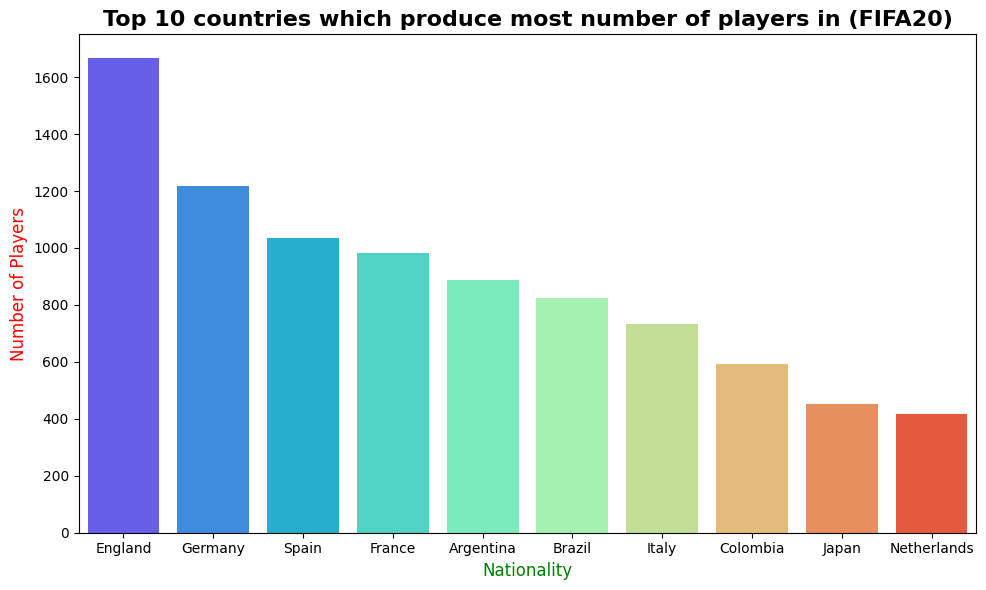

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10,x='nationality',y='players', palette='rainbow',hue='nationality')
plt.title('Top 10 countries which produce most number of players in (FIFA20)',fontsize=16, fontweight='bold')
plt.xlabel('Nationality',fontsize=12,color='green')
plt.ylabel('Number of Players',fontsize=12,color='red')
plt.tight_layout()
plt.show()

In [ ]:
pos_col = None
for c in df.columns:
    if c.lower() in ['position', 'player_positions', 'team_position', 'preferred_positions']:
        pos_col = c
        break

print("Using column:", pos_col)

Using column: team_position


In [ ]:
df['team_position'].value_counts()

,count
team_position,
SUB,7820
RES,2958
GK,662
LCB,660
RCB,660
RB,560
LB,560
ST,458
RCM,411


In [ ]:
forward_position=['LF','CF','RF']
df['main_position']=df['team_position'].astype(str).apply(lambda x: x.split(',')[0])
forward_df=df[df['main_position'].isin(forward_position)]

In [ ]:
avg_wages=forward_df.groupby('main_position')['wage_eur'].mean().sort_values(ascending=False)

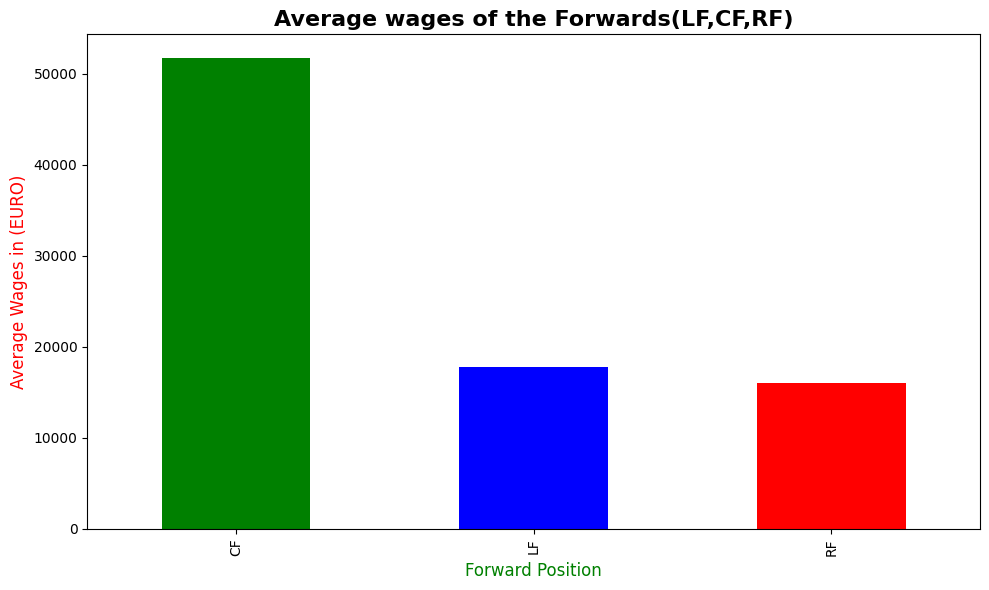

In [ ]:
colors=['green','blue','red']
plt.figure(figsize=(10,6))
avg_wages.plot(kind='bar', color=colors)
plt.title('Average wages of the Forwards(LF,CF,RF)',fontsize=16, fontweight='bold')
plt.xlabel('Forward Position',fontsize=12,color='green')
plt.ylabel('Average Wages in (EURO)',fontsize=12,color='red')
plt.tight_layout()
plt.show()

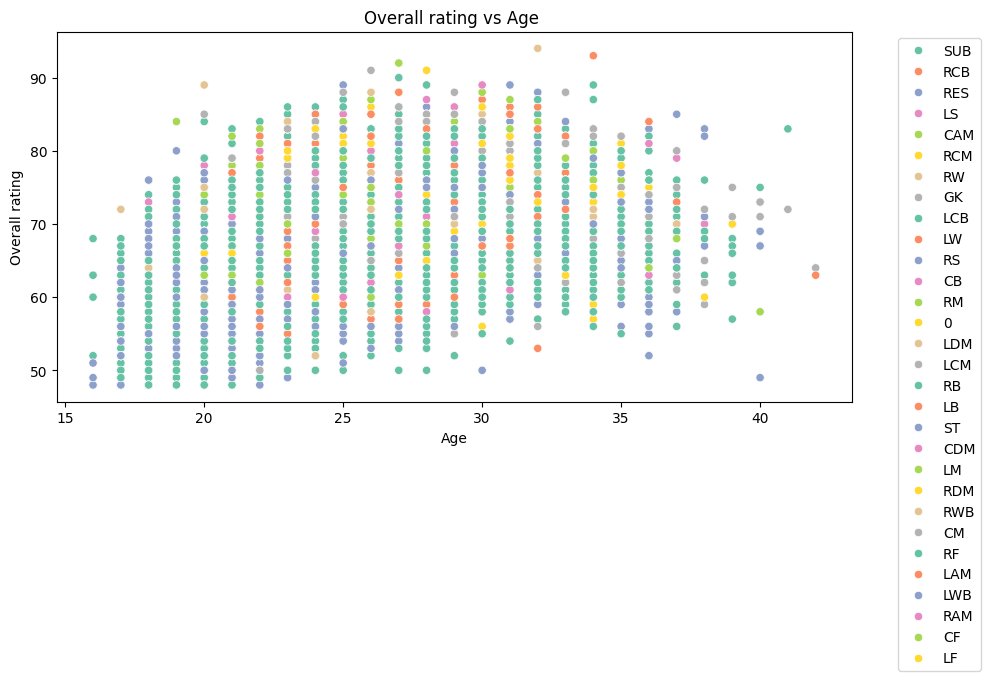

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df.sample(frac=0.7, random_state=1), x='age', y='overall', alpha=1,palette='Set2',hue='main_position')
plt.title("Overall rating vs Age ")
plt.xlabel("Age")
plt.ylabel("Overall rating")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

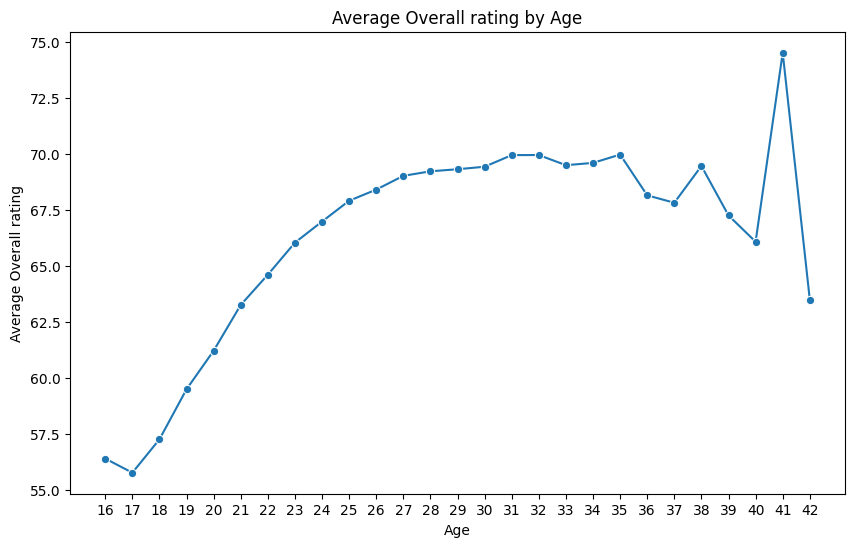

In [ ]:
avg_by_age = df.groupby('age')['overall'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_by_age, x='age', y='overall', marker='o')
plt.title("Average Overall rating by Age")
plt.xlabel("Age")
plt.ylabel("Average Overall rating")
plt.xticks(sorted(df['age'].unique()))
plt.show()

##Which offensive players tend to get paid most: ST vs RW vs LW?

In [ ]:
off_pos=['ST','RW','LW']
off_df=df[df['main_position'].isin(off_pos)]

In [ ]:
wage_stats = off_df.groupby('main_position')['wage_eur'].mean().sort_values(ascending=False)
print(wage_stats)

main_position
LW    23308.641975
RW    21024.844720
ST    16451.965066
Name: wage_eur, dtype: float64


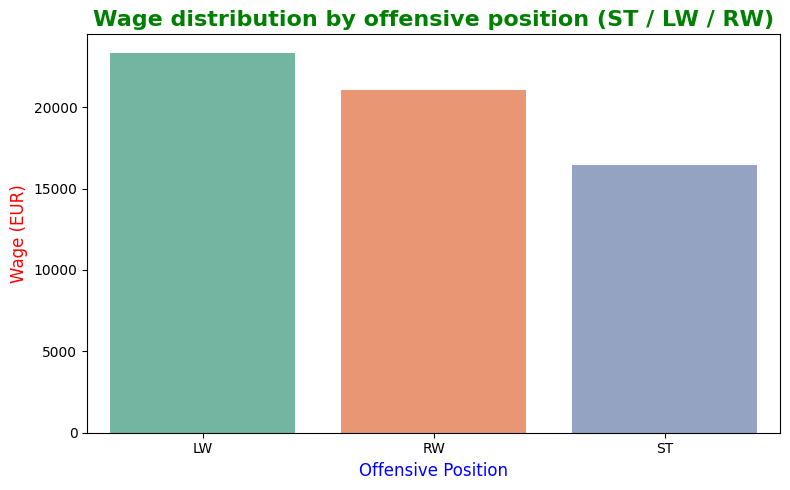

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=wage_stats.reset_index(), x='main_position', y='wage_eur',palette='Set2',hue='main_position')
plt.title("Wage distribution by offensive position (ST / LW / RW)",fontsize=16,fontweight='bold',color='green')
plt.xlabel("Offensive Position",fontsize=12,color='blue')
plt.ylabel("Wage (EUR)",fontsize=12,color='red')
plt.tight_layout()
plt.show()

In [ ]:
overall_stats = off_df.groupby('main_position')['overall'].agg(['mean','median','count']).sort_values('mean',ascending=False)
print(overall_stats)

                    mean  median  count
main_position                          
ST             70.401747    70.0    458
RW             70.341615    70.0    161
LW             70.191358    69.0    162


In [ ]:
preferred_leg=df['preferred_foot'].value_counts()
preferred_leg


,count
preferred_foot,
Right,13960
Left,4318


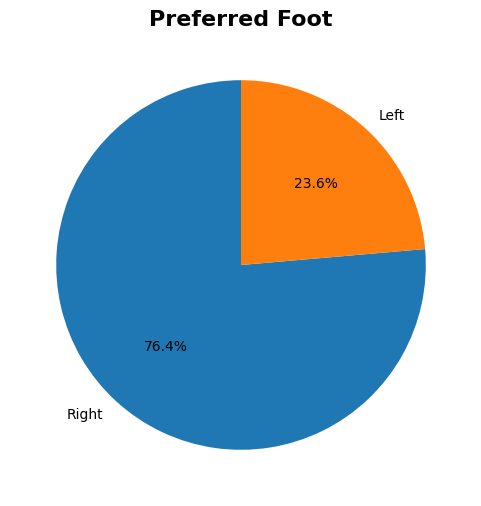

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(preferred_leg,labels=preferred_leg.index,autopct='%1.1f%%',startangle=90)
plt.title('Preferred Foot',fontsize=16,fontweight='bold')
plt.show()

In [ ]:
forward_positions=['ST', 'CF', 'LF', 'RF', 'LW', 'RW', 'LS', 'RS']
forward_df = df[df['team_position'].isin(forward_positions)]
forward_counts = forward_df['team_position'].value_counts()

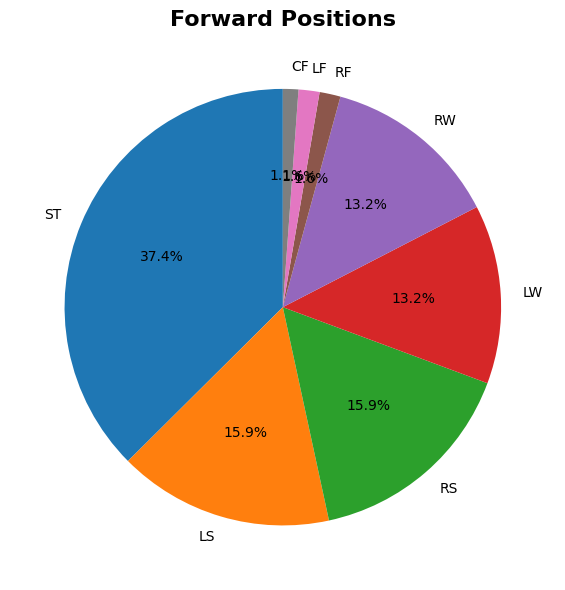

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(forward_counts, labels=forward_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Forward Positions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
defence_positions = ['CB', 'LB', 'RB', 'LCB', 'RCB', 'LWB', 'RWB']
defence_df = df[df['team_position'].isin(defence_positions)]
defence_counts = defence_df['team_position'].value_counts()

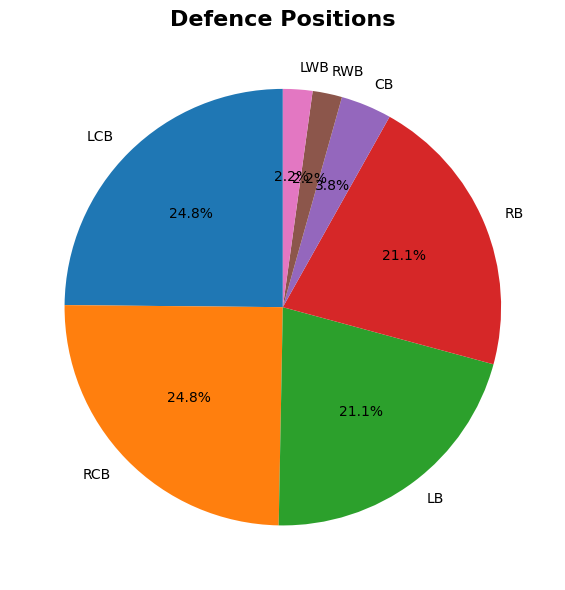

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(defence_counts, labels=defence_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Defence Positions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
midfielder_positions = ['CM', 'CDM', 'CAM', 'LM', 'RM', 'LCM', 'RCM', 'LDM', 'RDM']
midfielder_df = df[df['team_position'].isin(midfielder_positions)]
midfielder_counts=midfielder_df['team_position'].value_counts()

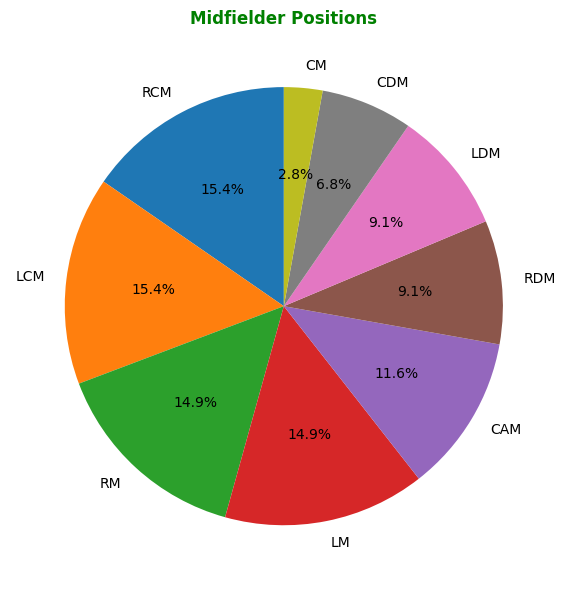

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(midfielder_counts,labels=midfielder_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Midfielder Positions',fontsize=12,fontweight='bold',color='green')
plt.tight_layout()
plt.show()

#Explore football skills and cluster players based on attributes

Choose relevant skill attributes (outfield skills)

Scale them, use elbow & silhouette to pick K, run KMeans

Show cluster centers and characterize clusters (e.g., high attacking, defensive, balanced)

Visualize clusters in 2D with PCA

In [ ]:
cols_to_drop = [
    'age','height_cm','weight_kg',
    'nationality','club','value_eur','wage_eur','player_position',
    'preferred_foot','international_reputation','weak_foot','skill_moves','work_rate',
    'release_clause_eur','player_tags',
    'team_jersey_number','contract_valid_until',
    'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm',
    'lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','player_traits'
]
# Exclude 'overall' and 'potential' from being dropped, as they are needed for final_score.
# They were mistakenly included in a previous version of cols_to_drop.
cols_to_drop = [col for col in cols_to_drop if col in df.columns and col not in ['overall', 'potential']]
df.drop(columns=cols_to_drop, inplace=True)

In [ ]:
col=df.columns
df[col]=df[col].fillna(0)

In [ ]:
df

,short_name,overall,potential,team_position,pace,shooting,passing,dribbling,defending,physic,...,position_LB,position_LM,position_LW,position_LWB,position_RB,position_RM,position_RW,position_RWB,position_ST,main_position
0,L. Messi,94,94,RW,87.0,92.0,92.0,96.0,39.0,66.0,...,0,0,0,0,0,0,1,0,0,RW
1,Cristiano Ronaldo,93,93,LW,90.0,93.0,82.0,89.0,35.0,78.0,...,0,0,0,0,0,0,0,0,1,LW
2,Neymar Jr,92,92,CAM,91.0,85.0,87.0,95.0,32.0,58.0,...,0,0,1,0,0,0,0,0,0,CAM
3,J. Oblak,91,93,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,GK
4,E. Hazard,91,91,LW,91.0,83.0,86.0,94.0,35.0,66.0,...,0,0,1,0,0,0,0,0,0,LW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,48,56,RES,57.0,23.0,28.0,33.0,47.0,51.0,...,0,0,0,0,0,0,0,0,0,RES
18274,Xiao Mingjie,48,56,SUB,58.0,24.0,33.0,35.0,48.0,48.0,...,0,0,0,0,0,0,0,0,0,SUB
18275,Zhang Wei,48,56,SUB,54.0,35.0,44.0,45.0,48.0,51.0,...,0,0,0,0,0,0,0,0,0,SUB
18276,Wang Haijian,48,54,SUB,59.0,35.0,47.0,47.0,45.0,52.0,...,0,0,0,0,0,0,0,0,0,SUB


In [ ]:
df.isnull().sum()

,0
short_name,0
overall,0
potential,0
team_position,0
pace,0
...,...
position_RM,0
position_RW,0
position_RWB,0
position_ST,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

out_cols = ['pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_finishing','attacking_short_passing','skill_ball_control','skill_dribbling','movement_acceleration','movement_sprint_speed','power_shot_power','power_strength','mentality_aggression','mentality_positioning']
out_cols = [c for c in out_cols if c in df.columns]


In [ ]:
df_out = df[df['main_position'] != 'GK'].dropna(subset=out_cols)

In [ ]:
scaler = StandardScaler()
scaled_out = scaler.fit_transform(df_out[out_cols])

In [ ]:
K = range(3, 11)
inertia_out = []
sil_out = []

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_out)
    inertia_out.append(km.inertia_)
    sil_out.append(silhouette_score(scaled_out, labels))

best_k_out = K[sil_out.index(max(sil_out))]
print("Best K for Outfield Players:", best_k_out)

Best K for Outfield Players: 3


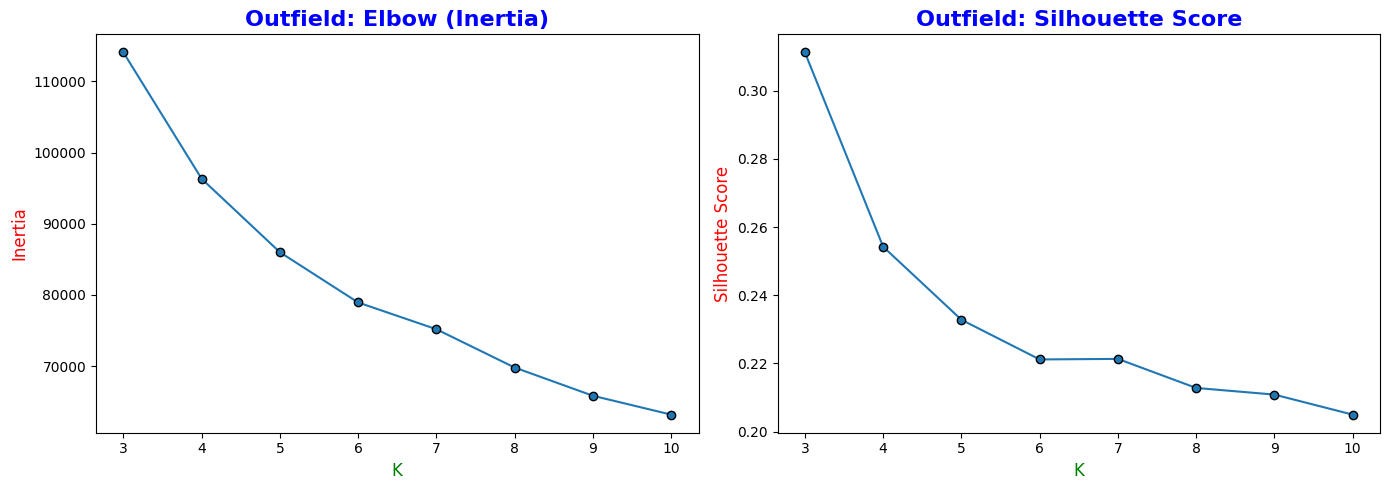

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(list(K), inertia_out, '-o',mec='black')
plt.title("Outfield: Elbow (Inertia)",fontsize=16,fontweight='bold',color='blue')
plt.xlabel("K",fontsize=12,color='green')
plt.ylabel("Inertia",fontsize=12,color='red')

plt.subplot(1, 2, 2)
plt.plot(list(K), sil_out, '-o',mec='black')
plt.title("Outfield: Silhouette Score",fontsize=16,fontweight='bold',color='blue')
plt.xlabel("K",fontsize=12,color='green')
plt.ylabel("Silhouette Score",fontsize=12,color='red')
plt.tight_layout()
plt.show()

In [ ]:
km_out = KMeans(n_clusters=best_k_out, random_state=42)
df_out['cluster'] = km_out.fit_predict(scaled_out)

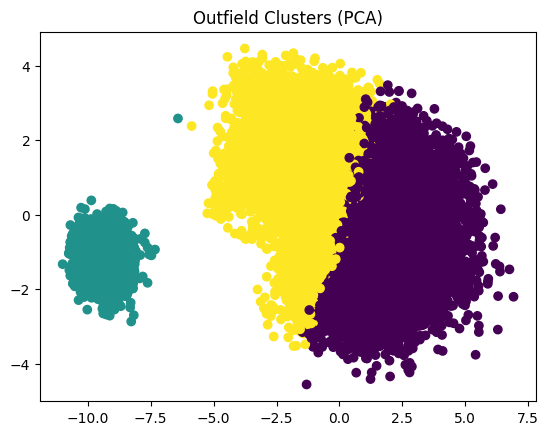

In [ ]:
pca = PCA(n_components=2)
pca_out = pca.fit_transform(scaled_out)
plt.scatter(pca_out[:,0], pca_out[:,1], c=df_out['cluster'])
plt.title("Outfield Clusters (PCA)")
plt.show()

#For Goalkeepers

In [ ]:
gk_cols = ['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_positioning']
gk_cols = [c for c in gk_cols if c in df.columns]

In [ ]:
df_gk = df[df['main_position'] == 'GK'].dropna(subset=gk_cols)

In [ ]:
scaler = StandardScaler()
scaled_gk = scaler.fit_transform(df_gk[gk_cols])

In [ ]:
K = range(3, 11)

inertia_gk = []
sil_gk = []

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_gk)
    inertia_gk.append(km.inertia_)
    sil_gk.append(silhouette_score(scaled_gk, labels))

best_k_gk = K[sil_gk.index(max(sil_gk))]
print("Best K for Goalkeepers:", best_k_gk)

Best K for Goalkeepers: 3


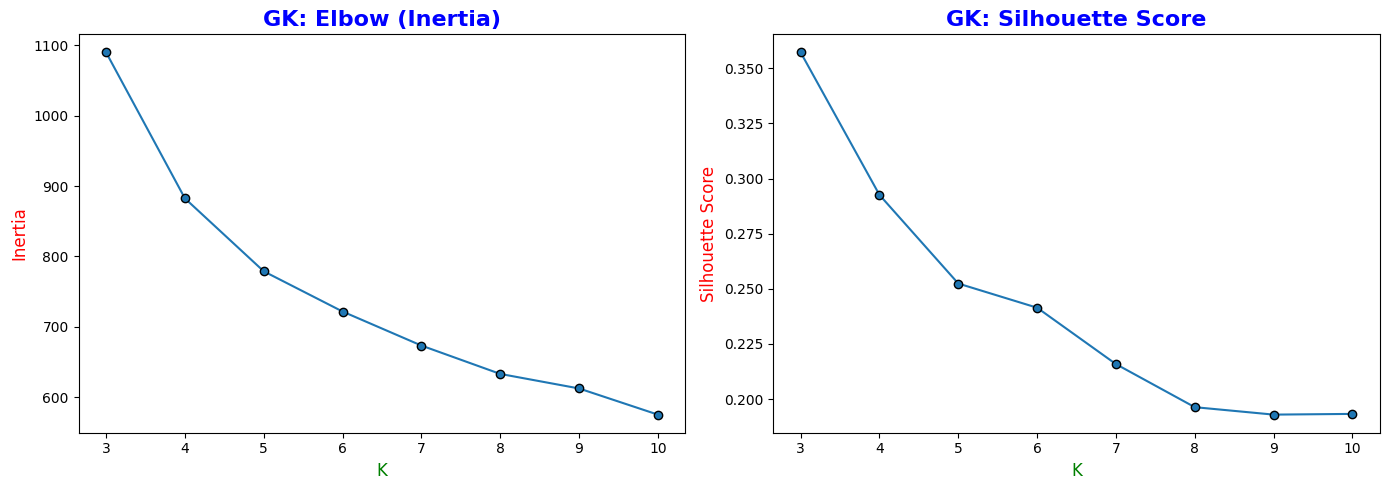

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(list(K), inertia_gk, '-o',mec='black')
plt.title("GK: Elbow (Inertia)",fontsize=16,fontweight='bold',color='blue')
plt.xlabel("K",fontsize=12,color='green')
plt.ylabel("Inertia",fontsize=12,color='red')

plt.subplot(1, 2, 2)
plt.plot(list(K), sil_gk, '-o',mec='black')
plt.title("GK: Silhouette Score",fontsize=16,fontweight='bold',color='blue')
plt.xlabel("K",fontsize=12,color='green')
plt.ylabel("Silhouette Score",fontsize=12,color='red')
plt.tight_layout()
plt.show()

In [ ]:
km_gk = KMeans(n_clusters=best_k_gk, random_state=42)
df_gk['cluster'] = km_gk.fit_predict(scaled_gk)

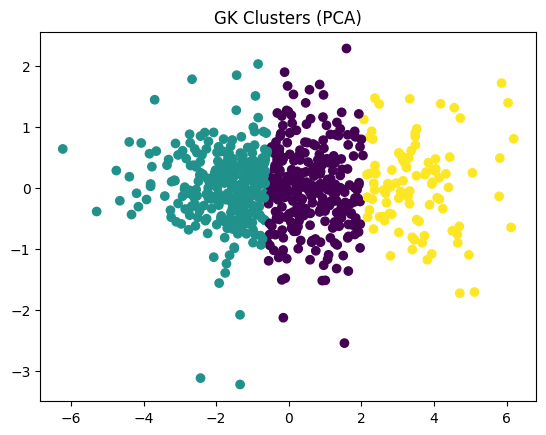

In [ ]:
pca = PCA(n_components=2)
pca_gk = pca.fit_transform(scaled_gk)
plt.scatter(pca_gk[:,0], pca_gk[:,1], c=df_gk['cluster'])
plt.title("GK Clusters (PCA)")
plt.show()

#Best and worst Players

In [ ]:
df['final_score'] = (df['overall'] * 0.5 + df['potential'] * 0.5 + df['dribbling'] * 0.1 + df['passing'] * 0.1 + df['shooting'] * 0.1)

In [ ]:
outfield_players = df[df['main_position'] != 'GK']
best_players = outfield_players.sort_values('final_score', ascending=False).head(10)
worst_players = outfield_players.sort_values('final_score', ascending=True).head(10)

In [ ]:
best_players

,short_name,overall,potential,team_position,pace,shooting,passing,dribbling,defending,physic,...,position_LM,position_LW,position_LWB,position_RB,position_RM,position_RW,position_RWB,position_ST,main_position,final_score
0,L. Messi,94,94,RW,87.0,92.0,92.0,96.0,39.0,66.0,...,0,0,0,0,0,1,0,0,RW,122.0
1,Cristiano Ronaldo,93,93,LW,90.0,93.0,82.0,89.0,35.0,78.0,...,0,0,0,0,0,0,0,1,LW,119.4
2,Neymar Jr,92,92,CAM,91.0,85.0,87.0,95.0,32.0,58.0,...,0,1,0,0,0,0,0,0,CAM,118.7
5,K. De Bruyne,91,91,RCM,76.0,86.0,92.0,86.0,61.0,78.0,...,0,0,0,0,0,0,0,0,RCM,117.4
4,E. Hazard,91,91,LW,91.0,83.0,86.0,94.0,35.0,66.0,...,0,1,0,0,0,0,0,0,LW,117.3
10,K. Mbappé,89,95,RW,96.0,84.0,78.0,90.0,39.0,75.0,...,0,0,0,0,0,0,0,1,RW,117.2
23,P. Dybala,88,92,RW,83.0,82.0,84.0,90.0,43.0,64.0,...,0,0,0,0,0,0,0,0,RW,115.6
9,M. Salah,90,90,RW,93.0,86.0,81.0,89.0,45.0,74.0,...,0,0,0,0,0,1,0,0,RW,115.6
8,L. Modrić,90,90,RCM,74.0,76.0,89.0,89.0,72.0,66.0,...,0,0,0,0,0,0,0,0,RCM,115.4
12,H. Kane,89,91,ST,70.0,91.0,79.0,81.0,47.0,83.0,...,0,0,0,0,0,0,0,1,ST,115.1


In [ ]:
worst_players

,short_name,overall,potential,team_position,pace,shooting,passing,dribbling,defending,physic,...,position_LM,position_LW,position_LWB,position_RB,position_RM,position_RW,position_RWB,position_ST,main_position,final_score
18166,Sun Qibin,50,51,SUB,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,SUB,50.5
18165,Teng Shangkun,50,51,RES,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,RES,50.5
18231,P. Królczyk,49,54,SUB,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,SUB,51.5
18229,Wang Zhifeng,49,55,SUB,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,SUB,52.0
18228,Park Han Geun,49,55,RES,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,RES,52.0
18164,A. Mills,50,54,SUB,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,SUB,52.0
17948,G. Maley,52,52,RES,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,RES,52.0
18163,H. Altıntaş,50,55,SUB,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,SUB,52.5
18161,Zhang Jingyi,50,55,SUB,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,SUB,52.5
18225,D. Mackay,49,56,SUB,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,SUB,52.5


#Best and Worst Goalkeepers

In [ ]:
gk_players = df[df['main_position'] == 'GK']

In [ ]:
best_gk = gk_players.sort_values('final_score', ascending=False).head(10)
worst_gk = gk_players.sort_values('final_score', ascending=True).head(10)

In [ ]:
best_gk

,short_name,overall,potential,team_position,pace,shooting,passing,dribbling,defending,physic,...,position_LM,position_LW,position_LWB,position_RB,position_RM,position_RW,position_RWB,position_ST,main_position,final_score
3,J. Oblak,91,93,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,92.0
6,M. ter Stegen,90,93,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,91.5
13,Alisson,89,91,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,90.0
25,Ederson,88,91,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,89.5
14,De Gea,89,90,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,89.5
74,G. Donnarumma,85,92,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,88.5
28,T. Courtois,88,89,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,88.5
32,H. Lloris,88,88,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,88.0
31,M. Neuer,88,88,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,88.0
30,S. Handanovič,88,88,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,88.0


In [ ]:
worst_gk

,short_name,overall,potential,team_position,pace,shooting,passing,dribbling,defending,physic,...,position_LM,position_LW,position_LWB,position_RB,position_RM,position_RW,position_RWB,position_ST,main_position,final_score
17349,Guo Wei,55,55,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,55.0
18131,M. Connor,50,62,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,56.0
17341,M. McGinley,55,57,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,56.0
17072,Shen Jun,56,56,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,56.0
16322,Zhang Chong,58,58,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,58.0
16335,Dong Chunyu,58,58,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,58.0
15813,P. Cherrie,59,59,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,59.0
15854,Y. Nishibe,59,59,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,59.0
15781,Du Jia,59,61,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,60.0
16961,Bao Yaxiong,56,65,GK,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,GK,60.5


#Overall Performance

In [ ]:
# Initialize 'cluster' column in df with NaN values
df['cluster'] = np.nan
df.loc[df_out.index, 'cluster'] = df_out['cluster']
df.loc[df_gk.index, 'cluster'] = df_gk['cluster']

In [ ]:
best_players

,short_name,overall,potential,team_position,pace,shooting,passing,dribbling,defending,physic,...,position_LM,position_LW,position_LWB,position_RB,position_RM,position_RW,position_RWB,position_ST,main_position,final_score
0,L. Messi,94,94,RW,87.0,92.0,92.0,96.0,39.0,66.0,...,0,0,0,0,0,1,0,0,RW,122.0
1,Cristiano Ronaldo,93,93,LW,90.0,93.0,82.0,89.0,35.0,78.0,...,0,0,0,0,0,0,0,1,LW,119.4
2,Neymar Jr,92,92,CAM,91.0,85.0,87.0,95.0,32.0,58.0,...,0,1,0,0,0,0,0,0,CAM,118.7
5,K. De Bruyne,91,91,RCM,76.0,86.0,92.0,86.0,61.0,78.0,...,0,0,0,0,0,0,0,0,RCM,117.4
4,E. Hazard,91,91,LW,91.0,83.0,86.0,94.0,35.0,66.0,...,0,1,0,0,0,0,0,0,LW,117.3
10,K. Mbappé,89,95,RW,96.0,84.0,78.0,90.0,39.0,75.0,...,0,0,0,0,0,0,0,1,RW,117.2
23,P. Dybala,88,92,RW,83.0,82.0,84.0,90.0,43.0,64.0,...,0,0,0,0,0,0,0,0,RW,115.6
9,M. Salah,90,90,RW,93.0,86.0,81.0,89.0,45.0,74.0,...,0,0,0,0,0,1,0,0,RW,115.6
8,L. Modrić,90,90,RCM,74.0,76.0,89.0,89.0,72.0,66.0,...,0,0,0,0,0,0,0,0,RCM,115.4
12,H. Kane,89,91,ST,70.0,91.0,79.0,81.0,47.0,83.0,...,0,0,0,0,0,0,0,1,ST,115.1


In [ ]:
worst_players

,short_name,overall,potential,team_position,pace,shooting,passing,dribbling,defending,physic,...,position_LM,position_LW,position_LWB,position_RB,position_RM,position_RW,position_RWB,position_ST,main_position,final_score
18166,Sun Qibin,50,51,SUB,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,SUB,50.5
18165,Teng Shangkun,50,51,RES,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,RES,50.5
18231,P. Królczyk,49,54,SUB,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,SUB,51.5
18229,Wang Zhifeng,49,55,SUB,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,SUB,52.0
18228,Park Han Geun,49,55,RES,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,RES,52.0
18164,A. Mills,50,54,SUB,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,SUB,52.0
17948,G. Maley,52,52,RES,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,RES,52.0
18163,H. Altıntaş,50,55,SUB,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,SUB,52.5
18161,Zhang Jingyi,50,55,SUB,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,SUB,52.5
18225,D. Mackay,49,56,SUB,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,SUB,52.5


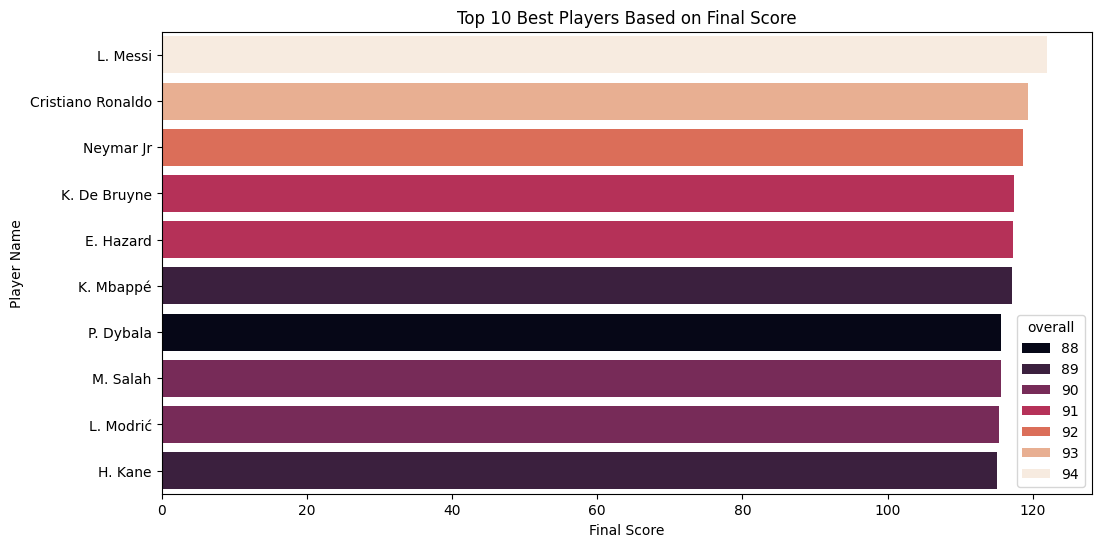

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=best_players,x='final_score',y='short_name',hue='overall',palette='rocket')
plt.title("Top 10 Best Players Based on Final Score")
plt.xlabel("Final Score")
plt.ylabel("Player Name")
plt.show()

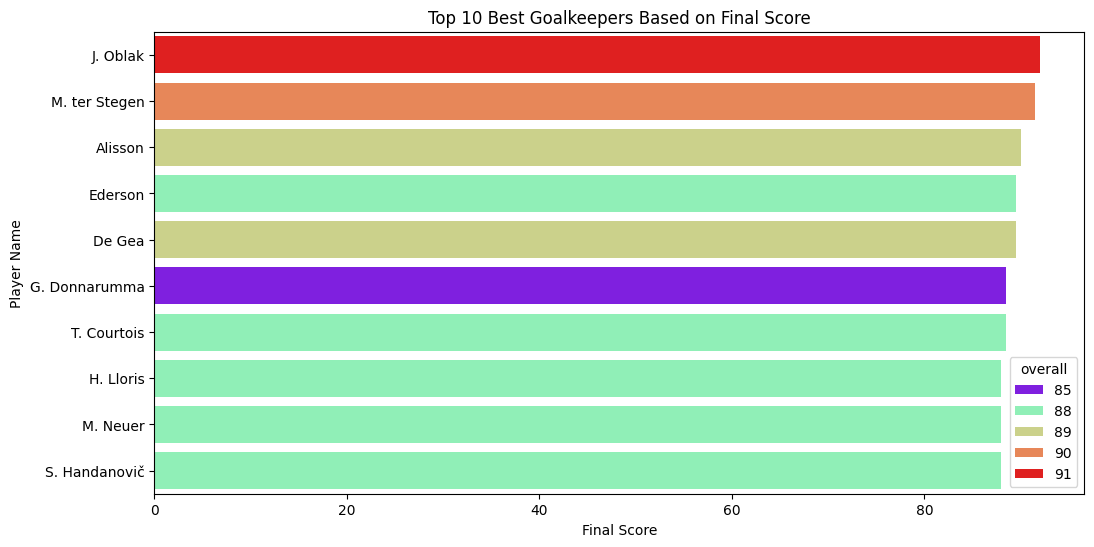

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=best_gk,x='final_score',y='short_name',hue='overall',palette='rainbow')
plt.title("Top 10 Best Goalkeepers Based on Final Score")
plt.xlabel("Final Score")
plt.ylabel("Player Name")
plt.show()

#CLASSIFIACTION MODEL BUILDING

In [ ]:
df['cluster'] = df['cluster']
x=df.drop(['cluster', 'main_position'],axis=1)
y=df['cluster']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train = x_train.select_dtypes(include=['int64','float64'])
x_test = x_test.select_dtypes(include=['int64','float64'])

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "SVM RBF": SVC(kernel='rbf'),
    "SVM Linear": SVC(kernel='linear'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(n_estimators=250,learning_rate=0.1,max_depth=6,subsample=0.8,colsample_bytree=0.8,eval_metric='mlogloss',random_state=42)
}

In [ ]:
best_model = None
best_accuracy = 0
accuracy_results = {}

for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    # Track best model
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

Logistic Regression Accuracy: 0.9743
KNN Accuracy: 0.9305
Random Forest Accuracy: 0.9584
SVM RBF Accuracy: 0.9672
SVM Linear Accuracy: 0.9754
Gradient Boosting Accuracy: 0.9639
XGBoost Accuracy: 0.9683


In [ ]:
print("\nBest Model:", best_model.__class__.__name__)
print("Best Accuracy:", best_accuracy)


Best Model: SVC
Best Accuracy: 0.975382932166302


Among all the models evaluated (Logistic Regression, KNN, SVM, Random Forest, Gradient Boosting, and XGBoost), Logistic Regression achieved the highest accuracy of 97.53% on the test set. This indicates that the player clusters generated from KMeans are highly separable, and the selected features provide strong predictive power. Therefore, Logistic Regression was chosen as the best classification model for predicting player roles.

#CHALLENGES FACED

During the analysis of the FIFA dataset, several challenges were encountered, which required proper data preprocessing before applying clustering models.

*Many skill-related columns contained missing values because players do not play in every position. Using mean or median was not appropriate—for example, a goalkeeper should not get an average striker rating. Therefore, missing values were replaced with zero, indicating that the player simply does not have that skill, which aligns better with real football logic.
*Some columns (e.g., LS, ST, RW) had values like "89+2" which indicate a base score plus a boost. To maintain consistency, only the base rating was extracted and the boost was removed. This helped standardize the features and prepare them for clustering.
*Numerical features had varying scales—for instance, passing ranged from 0–100 while wages were in thousands. Without scaling, the clustering model would give more importance to high-value features like salary. To prevent this bias, StandardScaler was applied to normalize all features, ensuring equal contribution during clustering.
*K-Means requires a predefined number of clusters, so the Elbow Method and Silhouette Analysis were applied to find the best value of k. Both methods indicated that 4 clusters were optimal, which aligns with real-world football roles: attacker, midfielder, defender, and goalkeeper.